TODO: table for Li EW for published planets

In [2]:
import numpy as np

# Constants
R_H = 1.0973731568508e7  # Rydberg constant for hydrogen in m^-1
c = 2.998e8              # Speed of light in m/s
h = 6.626e-34            # Planck's constant in J*s
eV = 1.602e-19           # Electron volt in Joules

# Function to calculate the wavelength of the emission/absorption lines using Rydberg formula
def calculate_wavelength(n_initial, n_final):
    """
    Calculate the wavelength for transitions between two energy levels in hydrogen-like atoms.

    Parameters:
    n_initial (int): Principal quantum number of the initial state (higher energy level)
    n_final (int): Principal quantum number of the final state (lower energy level)

    Returns:
    float: Wavelength in meters
    """
    # Calculate the wavelength using the Rydberg formula
    wavelength = 1 / (R_H * (1/n_final**2 - 1/n_initial**2))
    return wavelength

# Function to print wavelengths for the Balmer series (visible spectrum)
def balmer_series(n_final=1):
    """
    Print the wavelengths of the Balmer series for hydrogen, corresponding to transitions
    from n = 3, 4, 5, 6... down to n = 2.
    """
    print("Balmer Series (n_final = 2) Wavelengths (in nm):")
    for n_initial in range(3, 7):  # Calculating for n_initial = 3, 4, 5, 6
        wavelength_m = calculate_wavelength(n_initial, n_final)
        wavelength_nm = wavelength_m * 1e9  # Convert meters to nanometers
        print(f"Transition from n={n_initial} to n={n_final}: {wavelength_nm:.2f} nm")

balmer_series()

Balmer Series (n_final = 2) Wavelengths (in nm):
Transition from n=3 to n=1: 102.52 nm
Transition from n=4 to n=1: 97.20 nm
Transition from n=5 to n=1: 94.92 nm
Transition from n=6 to n=1: 93.73 nm


# Li EW

In [1]:
# %load init_ipynb
import os
import sys
import matplotlib.pyplot as pl

sys.path.insert(0, '../code')
assert os.environ["CONDA_DEFAULT_ENV"] == 'wakai'

plotpar = {'axes.labelsize': 16,
           'font.size': 16,
           'legend.fontsize': 16,
           'xtick.labelsize': 16,
           'ytick.labelsize': 16,
           #'text.usetex': False,
           'xtick.direction': 'in',
           'ytick.direction': 'in'
           }
pl.rcParams.update(plotpar)


## Stanford-Moore+2020 (field)

In [2]:
from catalog import CatalogDownloader

cd = CatalogDownloader(catalog_name="Stanford-Moore2020", catalog_type="LiEW")
tabs = cd.get_tables_from_vizier(row_limit=-1)

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/ApJ/898/27
{'J/ApJ/898/27/table2': 'BAFFLES ages for nearby stars'}


In [3]:
df = tabs[0].to_pandas()
df

,ID,RAJ2000,DEJ2000,SpType,B-V,logRHK,EW,Ref,_2.5Age1,_16Age1,...,_50Age2,_84Age2,_97.5Age2,_2.5AgeF,_16AgeF,_50AgeF,_84AgeF,_97.5AgeF,BVCat,SimbadName
0,BD+35 5152,00 00 35.97,+36 40 07.56,G0,0.662,NaN,104.5,4,NaN,NaN,...,565.0,3160.0,10100.0,67.099998,209.0,565.0,3160.0,10100.0,1,BD+35 5152
1,HD 224783,00 00 38.12,-66 40 59.43,G2IV/V,0.551,-4.782,NaN,3,1110.0,2430.0,...,NaN,NaN,NaN,1110.000000,2430.0,4390.0,7730.0,11800.0,1,HD 224783
2,HD 224789,00 00 40.32,-69 40 33.48,K1V,0.863,-4.535,NaN,3,249.0,630.0,...,NaN,NaN,NaN,249.000000,630.0,1330.0,3510.0,9270.0,3,HD 224789
3,CCDM J00014+3937AB,00 01 23.66,+39 36 38.56,K0,0.822,NaN,24.4,4,NaN,NaN,...,1690.0,3640.0,6960.0,349.000000,637.0,1690.0,3640.0,6960.0,1,CCDM J00014+3937AB
4,* 85 Peg,00 02 10.34,+27 04 54.48,G5VbFe-2,0.670,-4.843,NaN,3,1510.0,3230.0,...,NaN,NaN,NaN,1510.000000,3230.0,5620.0,8900.0,12200.0,1,* 85 Peg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,HD 224449,23 58 02.83,-01 58 48.12,G5/6IV,0.723,-4.748,NaN,3,922.0,2050.0,...,NaN,NaN,NaN,922.000000,2050.0,3780.0,7060.0,11600.0,1,HD 224449
2626,HD 224538,23 58 51.76,-61 35 12.38,F8/G0IV/V,0.581,-4.882,NaN,3,1830.0,3840.0,...,NaN,NaN,NaN,1830.000000,3840.0,6520.0,9720.0,12400.0,2,HD 224538
2627,HD 224601,23 59 14.43,+43 51 48.61,F8,0.541,-4.869,NaN,3,1720.0,3630.0,...,NaN,NaN,NaN,1720.000000,3630.0,6210.0,9430.0,12300.0,1,HD 224601
2628,HD 224618,23 59 27.88,-16 56 40.93,K0V,0.730,-4.926,NaN,3,2220.0,4580.0,...,NaN,NaN,NaN,2220.000000,4580.0,7560.0,10700.0,12600.0,1,HD 224618


## Grandjean+2020, 21, 23 (field)
* merge targets and query Li and/or logRHK from vizier because they are not included in the published table

In [6]:
from astroquery.vizier import Vizier
import pandas as pd

tables = {}
for i, key in enumerate(["J/A+A/669/A12", "J/A+A/650/A39", "J/A+A/633/A44"]):
    tabs = Vizier.get_catalogs(key)
    tables[i] = tabs[0].to_pandas()

In [7]:
df = pd.concat(tables).reset_index(drop=True)
df.tail()

,Name,RAJ2000,DEJ2000,Simbad,All,HIP,Inclusion,SpType,B-V,Mass,...,Age,e_Age,E_Age,r_Age,vsini,IR,r_IR,D,r_D,SimbadName
207,HIP44722,09 06 45.3496,-08 48 24.611,Simbad,NaN,<NA>,NaN,NaN,NaN,NaN,...,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,HIP46634,09 30 34.9989,+10 35 59.822,Simbad,NaN,<NA>,NaN,NaN,NaN,NaN,...,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,HIP51317,10 28 55.5513,+00 50 27.601,Simbad,NaN,<NA>,NaN,NaN,NaN,NaN,...,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,BD+20 2465,10 19 36.2808,+19 52 12.014,Simbad,NaN,<NA>,NaN,NaN,NaN,NaN,...,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,CD-46 1064,03 30 49.1011,-45 55 57.364,Simbad,NaN,<NA>,NaN,NaN,NaN,NaN,...,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
from astropy.coordinates import Angle
from tqdm import tqdm
from catalog import Target
import numpy as np

params = ["B-V", "log_R_HK_", "EWLi"]

data = pd.DataFrame()
for i,row in tqdm(df.iterrows()):

    ra = Angle(row.RAJ2000 , unit='hourangle')
    dec = Angle(row.DEJ2000 , unit='degree')
    t = Target(ra.deg, dec.deg)
    
    d = {}
    d['Name'] = row.Name
    for param in params:
        p = t.query_vizier_param(param)
        v = np.nanmean(list(p.values()))
        d[param] = v
    data = data.append(d, ignore_index=True)

0it [00:00, ?it/s]WARNING: UnitsWarning: The unit 'a' has been deprecated in the VOUnit standard. Suggested: 365.25d. [astropy.units.format.utils]
/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
1it [00:01,  1.14s/it]

Found 12 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
2it [00:02,  1.01s/it]

Found 8 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
3it [00:03,  1.14s/it]

Found 11 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
4it [00:04,  1.17s/it]

Found 12 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 2 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
5it [00:05,  1.13s/it]

Found 8 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
6it [00:06,  1.02s/it]

Found 7 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
7it [00:07,  1.03s/it]

Found 10 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
8it [00:08,  1.03s/it]

Found 8 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
9it [00:10,  1.25s/it]

Found 17 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
10it [00:11,  1.19s/it]

Found 8 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
11it [00:12,  1.21s/it]

Found 11 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
12it [00:13,  1.14s/it]

Found 8 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 1 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
13it [00:14,  1.06s/it]

Found 8 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
14it [00:15,  1.01it/s]

Found 11 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
15it [00:16,  1.03s/it]

Found 8 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
16it [00:17,  1.05it/s]

Found 16 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
17it [00:18,  1.03s/it]

Found 10 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
18it [00:19,  1.02s/it]

Found 8 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
19it [00:20,  1.01s/it]

Found 9 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
20it [00:21,  1.05it/s]

Found 8 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
21it [00:22,  1.01s/it]

Found 7 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
22it [00:23,  1.00s/it]

Found 9 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
23it [00:24,  1.01s/it]

Found 9 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
24it [00:25,  1.05it/s]

Found 9 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
25it [00:26,  1.02s/it]

Found 7 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
26it [00:27,  1.04it/s]

Found 8 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
27it [00:28,  1.02s/it]

Found 10 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
28it [00:29,  1.07it/s]

Found 9 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
29it [00:30,  1.03it/s]

Found 9 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
30it [00:31,  1.03s/it]

Found 8 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
31it [00:32,  1.02s/it]

Found 7 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
32it [00:32,  1.09it/s]

Found 8 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
33it [00:33,  1.09it/s]

Found 8 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
34it [00:34,  1.09it/s]

Found 9 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
35it [00:35,  1.11it/s]

Found 10 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
36it [00:36,  1.09it/s]

Found 9 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
37it [00:37,  1.11it/s]

Found 8 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
38it [00:38,  1.10it/s]

Found 9 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
39it [00:39,  1.07it/s]

Found 12 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
40it [00:40,  1.06it/s]

Found 10 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
41it [00:41,  1.02it/s]

Found 12 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
42it [00:42,  1.03it/s]

Found 9 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
43it [00:43,  1.05it/s]

Found 9 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
44it [00:44,  1.05it/s]

Found 9 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
45it [00:45,  1.05it/s]

Found 9 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
46it [00:46,  1.08it/s]

Found 8 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
47it [00:47,  1.06it/s]

Found 9 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
48it [00:48,  1.01it/s]

Found 12 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
49it [00:49,  1.01it/s]

Found 8 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
50it [00:50,  1.01it/s]

Found 9 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
51it [00:50,  1.04it/s]

Found 10 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
52it [00:52,  1.00it/s]

Found 7 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
53it [00:53,  1.05s/it]

Found 9 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
54it [00:54,  1.08s/it]

Found 11 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
55it [00:55,  1.08s/it]

Found 11 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
56it [00:56,  1.05s/it]

Found 8 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
57it [00:57,  1.11s/it]

Found 12 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
58it [00:58,  1.10s/it]

Found 8 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
59it [00:59,  1.07s/it]

Found 8 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
60it [01:00,  1.02s/it]

Found 11 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 1 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
61it [01:02,  1.12s/it]

Found 12 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
62it [01:03,  1.12s/it]

Found 11 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
63it [01:04,  1.06s/it]

Found 8 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
64it [01:05,  1.05s/it]

Found 11 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
65it [01:05,  1.01it/s]

Found 8 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
66it [01:06,  1.01it/s]

Found 11 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
67it [01:08,  1.04s/it]

Found 10 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
68it [01:08,  1.06it/s]

Found 8 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
69it [01:09,  1.09it/s]

Found 4 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
70it [01:11,  1.14s/it]

Found 22 references in Vizier with `B-V`.
Found 2 references in Vizier with `log_R_HK_`.
Found 2 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
71it [01:12,  1.24s/it]

Found 27 references in Vizier with `B-V`.
Found 1 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
72it [01:14,  1.25s/it]

Found 21 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
73it [01:15,  1.34s/it]

Found 24 references in Vizier with `B-V`.
Found 2 references in Vizier with `log_R_HK_`.
Found 1 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
74it [01:16,  1.32s/it]

Found 22 references in Vizier with `B-V`.
Found 2 references in Vizier with `log_R_HK_`.
Found 1 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
75it [01:18,  1.29s/it]

Found 11 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
76it [01:20,  1.60s/it]

Found 50 references in Vizier with `B-V`.
Found 3 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
77it [01:22,  1.60s/it]

Found 39 references in Vizier with `B-V`.
Found 1 references in Vizier with `log_R_HK_`.
Found 2 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
78it [01:23,  1.46s/it]

Found 12 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 1 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
79it [01:24,  1.51s/it]

Found 30 references in Vizier with `B-V`.
Found 1 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
80it [01:26,  1.55s/it]

Found 29 references in Vizier with `B-V`.
Found 1 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
81it [01:27,  1.40s/it]

Found 20 references in Vizier with `B-V`.
Found 2 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
82it [01:28,  1.29s/it]

Found 25 references in Vizier with `B-V`.
Found 1 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
83it [01:29,  1.21s/it]

Found 17 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
84it [01:30,  1.17s/it]

Found 24 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
85it [01:32,  1.51s/it]

Found 54 references in Vizier with `B-V`.
Found 2 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
86it [01:34,  1.53s/it]

Found 34 references in Vizier with `B-V`.
Found 2 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
87it [01:35,  1.37s/it]

Found 11 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
88it [01:37,  1.53s/it]

Found 28 references in Vizier with `B-V`.
Found 2 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
89it [01:39,  1.57s/it]

Found 31 references in Vizier with `B-V`.
Found 2 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
90it [01:40,  1.50s/it]

Found 33 references in Vizier with `B-V`.
Found 2 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
91it [01:41,  1.45s/it]

Found 34 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
92it [01:43,  1.41s/it]

Found 21 references in Vizier with `B-V`.
Found 1 references in Vizier with `log_R_HK_`.
Found 1 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
93it [01:44,  1.34s/it]

Found 30 references in Vizier with `B-V`.
Found 1 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
94it [01:45,  1.22s/it]

Found 13 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
95it [01:46,  1.18s/it]

Found 17 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
96it [01:46,  1.01s/it]

Found 16 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
97it [01:48,  1.05s/it]

Found 20 references in Vizier with `B-V`.
Found 1 references in Vizier with `log_R_HK_`.
Found 1 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
98it [01:49,  1.09s/it]

Found 13 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
99it [01:50,  1.20s/it]

Found 21 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
100it [01:51,  1.17s/it]

Found 22 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
101it [01:53,  1.22s/it]

Found 14 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
102it [01:55,  1.44s/it]

Found 50 references in Vizier with `B-V`.
Found 3 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
103it [01:56,  1.54s/it]

Found 34 references in Vizier with `B-V`.
Found 1 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
104it [01:58,  1.67s/it]

Found 46 references in Vizier with `B-V`.
Found 3 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
105it [01:59,  1.47s/it]

Found 17 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
106it [02:01,  1.44s/it]

Found 18 references in Vizier with `B-V`.
Found 1 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
107it [02:02,  1.39s/it]

Found 33 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
108it [02:03,  1.35s/it]

Found 18 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
109it [02:05,  1.47s/it]

Found 24 references in Vizier with `B-V`.
Found 2 references in Vizier with `log_R_HK_`.
Found 2 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
110it [02:06,  1.44s/it]

Found 18 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 1 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
111it [02:08,  1.48s/it]

Found 19 references in Vizier with `B-V`.
Found 1 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
112it [02:09,  1.31s/it]

Found 17 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
113it [02:10,  1.33s/it]

Found 14 references in Vizier with `B-V`.
Found 1 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


/tmp/ipykernel_15370/3471364870.py:19: RuntimeWarning: Mean of empty slice
  v = np.nanmean(list(p.values()))
/tmp/ipykernel_15370/3471364870.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
114it [02:11,  1.19s/it]

Found 18 references in Vizier with `B-V`.
Found 0 references in Vizier with `log_R_HK_`.
Found 0 references in Vizier with `EWLi`.


114it [02:13,  1.17s/it]

Found 40 references in Vizier with `B-V`.
Found 3 references in Vizier with `log_R_HK_`.
Found 1 references in Vizier with `EWLi`.


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U3'), dtype('<U3')) -> None

In [10]:
data.dropna()

,Name,B-V,log_R_HK_,EWLi
69,HD377,0.622859,-4.36,75.0610
72,HD13507,0.663304,-4.49,0.0690
73,HD13531,0.698459,-4.40,0.0520
76,HD25457,0.511179,-4.39,0.1055
91,HD90905,0.542033,-4.43,0.1300
96,HD107146,0.605399,-4.34,0.1230
108,HD166435,0.593482,-4.27,30.5050


## Gutierrez+2020 (cluster)

In [239]:
from catalog import CatalogDownloader

cd = CatalogDownloader(catalog_name="Gutierrez2020", catalog_type="LiEW")
tabs = cd.get_tables_from_vizier(row_limit=-1)

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/643/A71
{'J/A+A/643/A71/br44': 'Membership analysis and selection for Berkeley 44',
 'J/A+A/643/A71/br81': 'Membership analysis and selection for Berkeley 81',
 'J/A+A/643/A71/cha': 'Membership analysis and selection for Cha I',
 'J/A+A/643/A71/gamma': 'Membership analysis and selection for Gamma Vel',
 'J/A+A/643/A71/ic2391': 'Membership analysis and selection for IC 2391',
 'J/A+A/643/A71/ic2602': 'Membership analysis and selection for IC 2602',
 'J/A+A/643/A71/ic4665': 'Membership analysis and selection for IC 4665',
 'J/A+A/643/A71/m67': 'Membership analysis and selection for M 67',
 'J/A+A/643/A71/ngc2243': 'Membership analysis and selection for NGC 2243',
 'J/A+A/643/A71/ngc2516': 'Membership analysis and selection for NGC 2516',
 'J/A+A/643/A71/ngc2547': 'Membership analysis and selection for NGC 2547',
 'J/A+A/643/A71/ngc4815': 'Membership analysis and selection for NGC 4815',
 'J/A+A/643/A71/ngc6005': 'Membersh

See Fig 4.7 from [Guttierez's thesis](https://ui.adsabs.harvard.edu/abs/2022PhDT.........6G/abstract)
![img](../figures/LiTeff_GuttierezLuthien2022.png)

In [251]:
import pandas as pd
from pathlib import Path

fp = Path('../data/Gutierrez2020_orig.csv')
if not fp.exists():
    url = "https://www.aanda.org/articles/aa/full_html/2020/11/aa37620-20/T1.html"
    html = pd.read_html(url, #encoding ='us-ascii'
                       )
    df = html[0].dropna()
    df['Age'] = df.Age.replace(' \\(b\\)','', regex=True)
    df['Name'] = """rhoOph cha gammaVel ngc2457 ic2391 ic2602 ic4665 ngc2516 ngc6705 ngc4815 
                    ngc6633 tr23 br81 ngc6005 ngc6802 pismis18 tr20 br44 m67 ngc2243""".split()
    df.to_csv(fp)
else:
    df = pd.read_csv(fp, delimiter='\t')
    df['Name'] = """0 rhoOph cha gammaVel ngc2457 ic2391 ic2602 ic4665 ngc2516 ngc6705 ngc4815 
                    ngc6633 tr23 br81 ngc6005 ngc6802 pismis18 tr20 br44 m67 ngc2243""".split()
df.head()

/tmp/ipykernel_3859/893757674.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df.Age.replace(' \\(b\\)','', regex=True)
/tmp/ipykernel_3859/893757674.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name'] = """rhoOph cha gammaVel ngc2457 ic2391 ic2602 ic4665 ngc2516 ngc6705 ngc4815


Cluster     Age        [Fe/H]     Distance  \
  Unnamed: 0_level_1   (Myr)         (dex)        (kpc)   
0              ρ Oph     1–3  −0.08 ± 0.02  0.13 ± 0.01   
1              Cha I       2  −0.07 ± 0.04  0.16 ± 0.02   
2              γ Vel   10–20  −0.06 ± 0.02    0.35–0.40   
3           NGC 2547   35–45  −0.03 ± 0.06  0.36 ± 0.02   
4            IC 2391  36 ± 2  −0.03 ± 0.02  0.16 ± 0.01   

                 References                                    \
                       ages         [Fe/H]           distance   
0                      1, 2              2                  2   
1                   4, 5, 6           2, 5         4, 5, 7, 8   
2    2, 5, 7, 9, 11, 12, 26          2, 11    5, 7, 9, 12, 26   
3  2, 5, 15, 16, 17, 26, 39              2           2, 5, 26   
4     2, 15, 18, 19, 21, 23  2, 20, 21, 23  2, 19, 20, 21, 39   

                   GES membership      Name  
                          studies            
0                     1, 2 (a), 3    rhoOph  
1                   2, 4, 5, 7, 8       cha  
2  2, 5, 7, 9, 10, 11, 12, 13, 26  gammaVel  
3            2, 5, 14, 15, 17, 22   ngc2457  
4                   2, 14, 15, 22    ic2391

ngc2243 'DataFrame' object has no attribute 'Final'


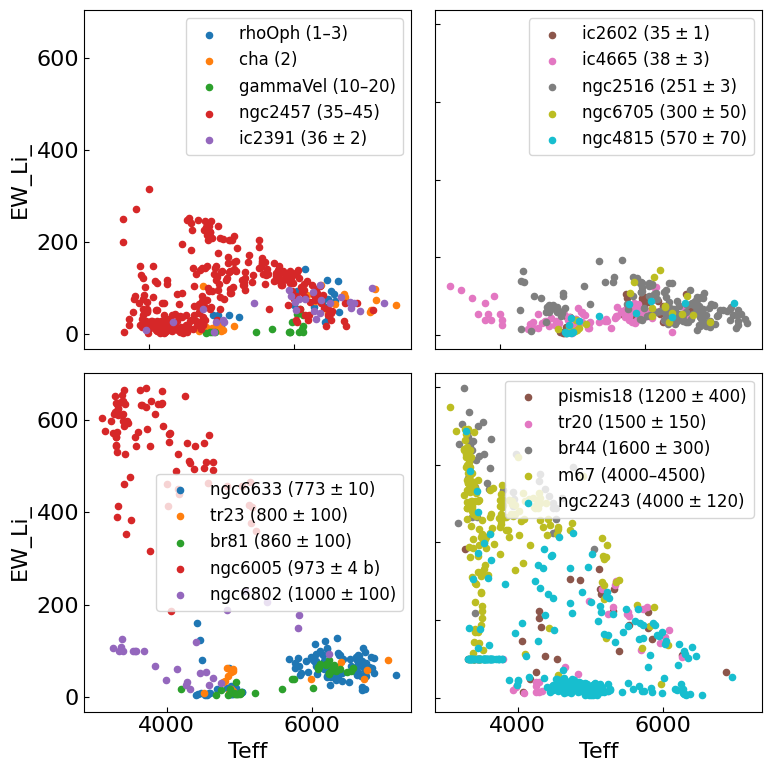

In [252]:
fig, axs = pl.subplots(2,2, figsize=(8,8), tight_layout=True, sharex='row', sharey='col')

dfs = {}
for i,key in enumerate(df.Name.values):
    ax = axs.flatten()[i//5]
    
    name = key.split('/')[-1]
    age = df.iloc[i]['Age'].values[0]
    d = tabs[i].to_pandas()
    #remove non-members
    try:
        d = d[d.Final=='Y']
    except Exception as e:
        print(name,e)
    _ = d.plot(x='Teff', y='EW_Li_', kind='scatter', ax=ax, c=f"C{i}", label=f"{name} ({age})")
    ax.legend(fontsize=12)
    ax.invert_xaxis()
    dfs[name] = d

In [266]:
cols = ['Name', 'CNAME', 'RV', 'e_RV', 'Teff', 'e_Teff', 'logg', 'e_logg', 
        '__Fe_H_', 'e__Fe_H_', 
        #'l_EW_Li_', 
        'EW_Li_', 'e_EW_Li_', 
        #'f_e_EW_Li_'
       ]
left = pd.concat(dfs).reset_index().drop(['level_1', 'ID'], axis=1)
left = left.rename({'level_0': 'Name'}, axis=1)[cols]

right = pd.Series({'rhoOph': '1–3',
                      'Cha': '2',
                      'gammaVel': '10–20',
                      'NGC 2547':  '35–45',
                      'IC 2391': '36 ± 2',
                      'IC 2602': '35 ± 1',
                      'IC 4665': '38 ± 3',
                      'NGC 2516': '251 ± 3',
                      'NGC 6705': '300 ± 50',
                      'NGC 4815': '570 ± 70',
                      'NGC 6633': '773 ± 10',
                      'Trumpler 23': '800 ± 100',
                      'Berkeley 81' : '860 ± 100',
                      'NGC 6005': '973 ± 4',
                      'NGC 6802': '1000 ± 100',
                      'Pismis 18': '1200 ± 400',
                      'Trumpler 20': '1500 ± 150',
                      'Berkeley 44': '1600 ± 300',
                      'M67': '4000-4500',
                      'NGC 2243': '4000 ± 120'}, name='Age'
                   )
right

rhoOph                1–3
Cha                     2
gammaVel            10–20
NGC 2547            35–45
IC 2391            36 ± 2
IC 2602            35 ± 1
IC 4665            38 ± 3
NGC 2516          251 ± 3
NGC 6705         300 ± 50
NGC 4815         570 ± 70
NGC 6633         773 ± 10
Trumpler 23     800 ± 100
Berkeley 81     860 ± 100
NGC 6005          973 ± 4
NGC 6802       1000 ± 100
Pismis 18      1200 ± 400
Trumpler 20    1500 ± 150
Berkeley 44    1600 ± 300
M67             4000-4500
NGC 2243       4000 ± 120
Name: Age, dtype: object

In [267]:
df_final = pd.merge(left, right, on='Name')
# df_final = df_final.apply(pd.to_numeric)
# df_final = df_final.applymap(lambda x: x.decode("ascii") if isinstance(x, bytes) else str(x))
# df_final.Age = df_final.Age.str.replace('\W', '-', regex=True)
# df_final.Distance = df_final.Distance.str.replace('\W', '.', regex=True)
df_final.tail()

KeyError: 'Name'

In [ ]:
df_final.to_csv("../data/Li_catalog_Gutierrez2020.csv", encoding="us-ascii")

# Li abundances

## Franciosini+2022

In [26]:
from catalog import CatalogDownloader

cd = CatalogDownloader(catalog_name="Franciosini2022", catalog_type="LiEW")
tabs = cd.get_tables_from_vizier(row_limit=-1)

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A%2bA/659/A85
{'J/A+A/659/A85/tableb1': 'High-probability members of 25 Ori',
 'J/A+A/659/A85/tableb2': 'High-probability members of Gamma Vel A',
 'J/A+A/659/A85/tableb3': 'High-probability members of Gamma Vel B',
 'J/A+A/659/A85/tableb4': 'High-probability members of NGC2451B',
 'J/A+A/659/A85/tableb5': 'High-probability members of NGC2547',
 'J/A+A/659/A85/tableb6': 'High-probability members of NGC2516'}


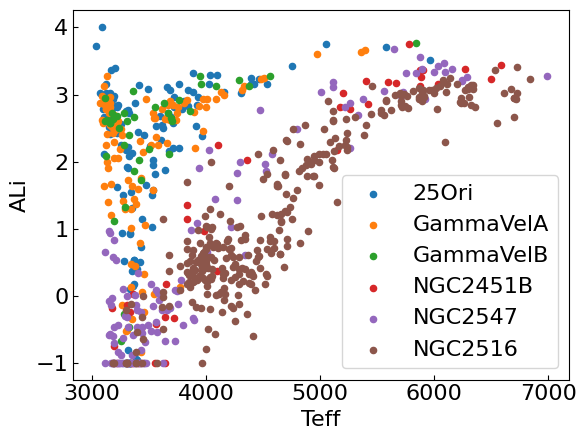

In [27]:
cnames = "25Ori GammaVelA GammaVelB NGC2451B NGC2547 NGC2516".split()
dfs = {}
for i,tab in enumerate(tabs):
    name = cnames[i]    
    df = tab.to_pandas()
    
    if i==0:
        ax=None
    ax = df.plot(x='Teff', y='ALi', kind='scatter', ax=ax, c=f"C{i}", label=name)
    ax.legend()
    ax.invert_xaxis()
    
    dfs[name] = df

merge A Li from Deliyannis+2019

In [28]:
cd = CatalogDownloader(catalog_name="Deliyannis2019", catalog_type="LiEW")
tabs = cd.get_tables_from_vizier(row_limit=-1)

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/AJ/158/163
{'J/AJ/158/163/table1': 'Li abundance values for stars in NGC 6819'}


In [29]:
d = tabs[0].to_pandas()
d.head()

,WOCS,PMga,PARga,Bin,Mem,S_N,Teff,__Fe_H_,l_A_Li_,A_Li_,e_A_Li_,Simbad,_RA,_DE
0,1002,Y,Y,N,Y,57,3967,-0.28,,0.3,0.08,Simbad,295.32105,40.18107
1,1004,Y,Y,N,Y,66,4242,-0.06,<,-1.2,NaN,Simbad,295.36078,40.19494
2,1007,Y,Y,N,Y,53,4231,-0.13,<,-1.5,NaN,Simbad,295.30504,40.24907
3,1014,Y,Y,N,Y,57,4270,-0.02,<,-1.5,NaN,Simbad,295.39331,40.29672
4,1016,Y,Y,N,Y,19,4119,0.06,,NaN,NaN,Simbad,295.28428,40.32552


In [34]:
dfs['25Ori'].columns

Index(['Cname', 'GaiaEDR3', 'RA_ICRS', 'DE_ICRS', 'RV', 'e_RV', 'Teff',
       'e_Teff', 'l_ALi', 'ALi', 'e_ALi', 'n_ALi', 'plx', 'e_plx', 'pmRA',
       'e_pmRA', 'pmDE', 'e_pmDE', 'RUWE', 'astrflg', 'Gmag', 'BPmag', 'RPmag',
       'photflg', 'Prob', '_RA.icrs', '_DE.icrs'],
      dtype='object')

In [33]:
d.columns

Index(['WOCS', 'PMga', 'PARga', 'Bin', 'Mem', 'S_N', 'Teff', '__Fe_H_',
       'l_A_Li_', 'A_Li_', 'e_A_Li_', 'Simbad', '_RA', '_DE'],
      dtype='object')

In [40]:
d = d.rename({'l_A_Li_': 'l_ALi', 
          'A_Li_': 'ALi',
          'e_A_Li_': 'e_ALi'
         }, axis=1)

In [41]:
dfs['NGC6819'] = d

In [43]:
pd.concat(dfs)

Cname      GaiaEDR3    RA_ICRS   DE_ICRS         RV  \
25Ori   0    05225186+0145132  3.234193e+18  80.716105  1.753682  21.090000   
        1    05225609+0136252  3.222181e+18  80.733684  1.607000  19.940001   
        2    05225889+0145437  3.234194e+18  80.745381  1.762147  20.820000   
        3    05230387+0134335  3.222180e+18  80.766089  1.576025  21.240000   
        4    05230596+0138511  3.222182e+18  80.774851  1.647538  21.000000   
...                       ...           ...        ...       ...        ...   
NGC6819 328               NaN           NaN        NaN       NaN        NaN   
        329               NaN           NaN        NaN       NaN        NaN   
        330               NaN           NaN        NaN       NaN        NaN   
        331               NaN           NaN        NaN       NaN        NaN   
        332               NaN           NaN        NaN       NaN        NaN   

             e_RV         Teff     e_Teff l_ALi   ALi  ...     WOCS PMga  \
25Ori   0    0.56  3202.600098  50.500000        3.39  ...      NaN  NaN   
        1    0.35  3333.399902  48.900002     < -1.00  ...      NaN  NaN   
        2    0.27       3320.0  48.500000        2.73  ...      NaN  NaN   
        3    0.24       4157.5  66.000000        3.04  ...      NaN  NaN   
        4    0.37  3453.800049  49.799999        2.40  ...      NaN  NaN   
...           ...          ...        ...   ...   ...  ...      ...  ...   
NGC6819 328   NaN       6364.0        NaN        2.55  ...  72024.0    Y   
        329   NaN         <NA>        NaN         NaN  ...  73017.0    N   
        330   NaN       6326.0        NaN        2.59  ...  75017.0    Y   
        331   NaN       6225.0        NaN        2.88  ...  80024.0    Y   
        332   NaN       5879.0        NaN        2.96  ...  80025.0    Y   

             PARga  Bin  Mem   S_N  __Fe_H_  Simbad        _RA       _DE  
25Ori   0      NaN  NaN  NaN  <NA>      NaN     NaN        NaN       NaN  
        1      NaN  NaN  NaN  <NA>      NaN     NaN        NaN       NaN  
        2      NaN  NaN  NaN  <NA>      NaN     NaN        NaN       NaN  
        3      NaN  NaN  NaN  <NA>      NaN     NaN        NaN       NaN  
        4      NaN  NaN  NaN  <NA>      NaN     NaN        NaN       NaN  
...            ...  ...  ...   ...      ...     ...        ...       ...  
NGC6819 328      Y    N    Y   106    -0.04  Simbad  295.53505  40.30124  
        329      Y    N    N  <NA>      NaN  Simbad  295.20397  40.09811  
        330      Y    N    Y    87     0.07  Simbad  295.29178  40.33404  
        331      Y    N    Y   124    -0.03  Simbad  295.52003  40.32079  
        332      Y    N    Y    91    -0.25  Simbad  295.44547  40.37393  

[2144 rows x 37 columns]

## Magrini+2021

In [4]:
from catalog import CatalogDownloader
import numpy as np

cd = CatalogDownloader(catalog_name="Magrini2021", catalog_type="LiEW")
tabs = cd.get_tables_from_vizier(row_limit=-1)

{'J/A+A/651/A84/table2': 'Parameters of the Li-rich giant stars in the field',
 'J/A+A/651/A84/tablea1': 'Parameters of our open clusters from Gaia-ESO IDR6',
 'J/A+A/651/A84/tablea2': 'Cluster member stars',
 'J/A+A/651/A84/tablea3': 'Field stars'}


In [7]:
df = tabs[0].to_pandas()
df.head()

,GESField,CName,Setup,Teff,e_Teff,logg,e_logg,__Fe_H_,e__Fe_H_,vsini,e_vsini,Li1,e_Li1,Other,Simbad,_RA,_DE
0,NGC2232,06273069-0440141,HR15N,4473,93,NaN,NaN,-0.47,0.10,7.0,0.0,2.92,0.16,,Simbad,96.87787,-4.67058
1,NGC2232,06300202-0435151,HR15N,4642,84,2.61,0.11,-0.01,0.06,7.0,0.0,2.53,0.14,,Simbad,97.50842,-4.58753
2,NGC2264,06410098+0932444,HR15N,4993,94,NaN,NaN,-0.06,0.08,12.0,0.9,3.86,0.15,,Simbad,100.25408,9.54567
3,Br75,06490710-2359450,HR15N,4993,64,2.87,0.17,-0.29,0.05,7.0,0.0,2.19,0.08,,Simbad,102.27958,-23.99583
4,NGC2425,07383630-1458067,HR15N,4844,64,2.55,0.17,-0.14,0.05,7.0,0.0,2.00,0.09,,Simbad,114.65125,-14.96853


<AxesSubplot:xlabel='Teff', ylabel='Li1'>

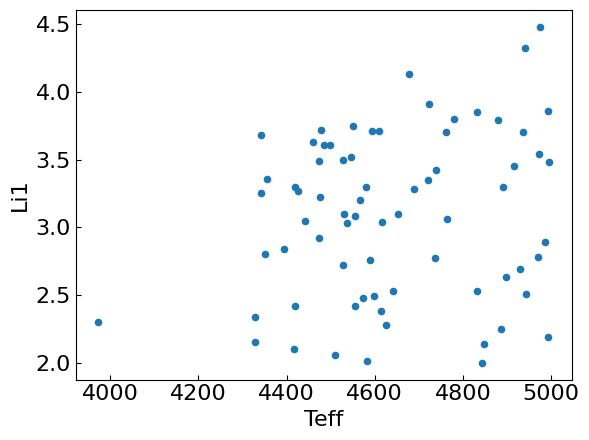

In [11]:
df.plot(x='Teff', y='Li1', kind='scatter')

In [4]:
from utils import get_nexsci_data

df_nexsci = get_nexsci_data(table_name="ps", clobber=False)
# df_nexsci.columns.tolist()

Column definitions:  https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html
Loaded:  ../data/nexsci_ps.csv


/home/jp/github/research/project/wakai/notebooks/../code/utils.py:39: DtypeWarning: Columns (3,4,50,65,148,153,183,206,211,237,242) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nexsci = pd.read_csv(fp)


In [5]:
from catalog import CatalogDownloader
import numpy as np

cd = CatalogDownloader(catalog_name="Bouvier2018_Pleiades", catalog_type="LiEW")
tabs = cd.get_tables_from_vizier(row_limit=-1)
df_Pleiades = tabs[0].to_pandas()
df_Pleiades['logTeff'] = df_Pleiades.Teff.apply(lambda x: np.log10(x))
df_Pleiades['EW_Li_'] = df_Pleiades['WLi'].copy()
# df_PisEri.head()
df_Pleiades

{'J/A+A/613/A63/tableb1': 'Stellar parameters and lithium content for our 148 '
                          'stars'}


,Name,EPIC,RAJ2000,DEJ2000,Vmag,J-K,Per,Amp,l_WLi,WLi,e_WLi,Teff,ALi,e_ALi,Bin,SimbadName,logTeff,EW_Li_
0,PELS123,211002011,53.30793,23.00647,11.98,0.591,7.575758,0.028,,132.0,4.0,4945.0,1.946,0.085,,Cl* Melotte 22 PELS 123,3.694166,132.0
1,PELS124,210990525,53.88203,22.82362,9.86,0.289,2.795300,0.005,,98.0,10.0,6307.0,3.120,0.059,,Cl* Melotte 22 PELS 124,3.799823,98.0
2,PELS189,211065162,54.12626,24.01222,12.26,0.567,7.575758,0.035,,118.0,6.0,5011.0,1.948,0.083,,Cl* Melotte 22 PELS 189,3.699924,118.0
3,PELS019,211095259,55.12802,24.48730,11.72,0.524,6.849315,0.022,,49.0,5.0,5168.0,1.622,0.079,,Cl* Melotte 22 PELS 019,3.713323,49.0
4,DH156,211039307,55.21359,23.59843,12.79,0.650,8.333334,0.085,<,15.0,NaN,4708.0,0.498,0.092,,Cl* Melotte 22 DH 156,3.672836,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,V1289Tau,211087059,58.60518,24.36008,11.05,0.509,0.689700,0.110,,227.0,20.0,5215.0,2.850,0.095,,V1289Tau,3.717254,227.0
144,DH803,211084620,58.61852,24.32115,14.20,0.829,4.620300,0.035,,70.0,10.0,4100.0,0.455,0.072,,Cl* Melotte 22 DH 803,3.612784,70.0
145,PELS192,211049922,58.87085,23.77245,14.12,0.829,3.018400,0.075,,80.0,10.0,4100.0,0.532,0.071,,Cl* Melotte 22 PELS 192,3.612784,80.0
146,PELS162,211067702,59.38879,24.05319,12.11,0.589,7.692308,0.021,,44.0,4.0,4950.0,1.309,0.085,,Cl* Melotte 22 PELS 162,3.694605,44.0


In [6]:
cd = CatalogDownloader(catalog_name="Cummings2017_HyadesPraesepe", catalog_type="LiEW")
tabs = cd.get_tables_from_vizier(row_limit=-1)
df_Hyades = tabs[0].to_pandas()
df_Praesepe = tabs[1].to_pandas()
df_Hyades['logTeff'] = df_Hyades.Teff.apply(lambda x: np.log10(x))
df_Praesepe['logTeff'] = df_Praesepe.Teff.apply(lambda x: np.log10(x))
# df_PisEri['st_rotp'] = df_PisEri['Prot'].copy()
# df_PisEri.head()
df_Hyades

{'J/AJ/153/128/table6': 'Stellar Lithium Data for The Hyades',
 'J/AJ/153/128/table7': 'Stellar Lithium Data for Praesepe'}


,Group,ID,n_ID,__B-V_mean,Teff,e_Teff,n_Teff,EW_Li_,e_EW_Li_,A_Li_,...,l_vsini,vsini,RV,e_RV,Ref,Prime,SimbadName,_RA,_DE,logTeff
0,A,1,,0.567,6048.100098,55.900002,,102.230003,1.16,2.945,...,,7.0,32.439999,0.21,2,yes,Cl Melotte 25 1,49.35994,7.65581,3.781619
1,A,2,,0.619,5872.600098,20.299999,,93.709999,1.35,2.720,...,,11.0,32.779999,0.42,1,yes,Cl Melotte 25 2,49.38658,7.69015,3.768830
2,A,6,,0.327,7013.700195,65.599998,,52.299999,1.85,3.280,...,,62.0,35.000000,2.50,3,yes,Cl Melotte 25 6,58.29186,17.32709,3.845947
3,A,10,,0.576,6025.500000,68.500000,,80.940002,1.83,2.770,...,,10.0,37.799999,0.28,1,yes,Cl Melotte 25 10,61.56720,15.69812,3.779993
4,A,11,,0.394,6730.100098,92.300003,,13.620000,1.15,2.390,...,,30.0,36.520000,1.09,1,---,Cl Melotte 25 11,61.92493,15.16279,3.828022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,D,96,,0.841,5159.799805,NaN,*,6.000000,NaN,0.550,...,,9.0,37.599998,1.20,2,---,Cl Melotte 25 96,68.49389,15.16369,3.712633
86,D,101,,0.433,6573.500000,86.599998,,5.920000,NaN,1.850,...,,51.0,33.700001,1.20,3,---,Cl Melotte 25 101,69.16966,15.86935,3.817797
87,D,115,,0.843,5154.000000,NaN,*,3.000000,NaN,0.550,...,,5.0,41.840000,0.44,2,---,Cl Melotte 25 115,72.17553,21.10105,3.712144
88,D,124,,0.497,6320.600098,NaN,*,8.690000,NaN,1.750,...,,34.0,39.830002,0.24,3,---,Cl Melotte 25 124,72.95828,13.65515,3.800758


In [7]:
df_Praesepe

,Group,ID,n_ID,__B-V_mean,Teff,e_Teff,EW_Li_,e_EW_Li_,A_Li_,e_A_Li_S_N,...,l_vsini,vsini,RV,e_RV,Ref,Prime,SimbadName,_RA,_DE,logTeff
0,A,23,,0.699,5627.899902,53.799999,32.240002,NaN,1.773,NaN,...,,5.1,35.209999,0.23,7,yes,Cl* NGC 2632 KW 23,129.29787,19.80368,3.750346
1,A,27,,0.731,5526.399902,62.900002,28.150000,1.23,1.520,0.035,...,<,6.0,34.110001,0.38,1,yes,Cl* NGC 2632 KW 27,129.32622,19.69900,3.742442
2,A,30,,0.681,5686.799805,111.300003,46.049999,1.82,2.085,0.024,...,,8.0,34.610001,0.34,1,---,Cl* NGC 2632 KW 30,129.34261,20.17701,3.754868
3,A,31,b,0.559,6111.200195,39.700001,46.169998,NaN,2.529,NaN,...,,10.5,35.110001,0.23,8,---,Cl* NGC 2632 KW 31,129.36643,19.56255,3.786127
4,A,32,,0.796,5325.100098,21.700001,NaN,2.18,0.910,NaN,...,,9.0,35.029999,0.35,1,yes,Cl* NGC 2632 KW 32,129.36480,19.61757,3.726328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,C,792W,,1.130,4484.399902,NaN,6.990000,NaN,0.000,NaN,...,,8.0,34.759998,0.57,1,---,,NaN,NaN,3.651704
106,C,899W,,0.995,4787.500000,NaN,8.760000,NaN,0.210,NaN,...,,10.0,35.090000,0.56,1,---,,NaN,NaN,3.680109
107,D,47,,0.498,6338.000000,56.299999,8.670000,NaN,1.750,NaN,...,,12.4,34.990002,0.13,8,yes,Cl* NGC 2632 KW 47,129.42651,19.13377,3.801952
108,D,250,,0.476,6423.100098,35.599998,4.590000,NaN,1.700,NaN,...,,36.0,34.099998,0.96,1,yes,Cl* NGC 2632 KW 250,130.02043,19.72926,3.807745


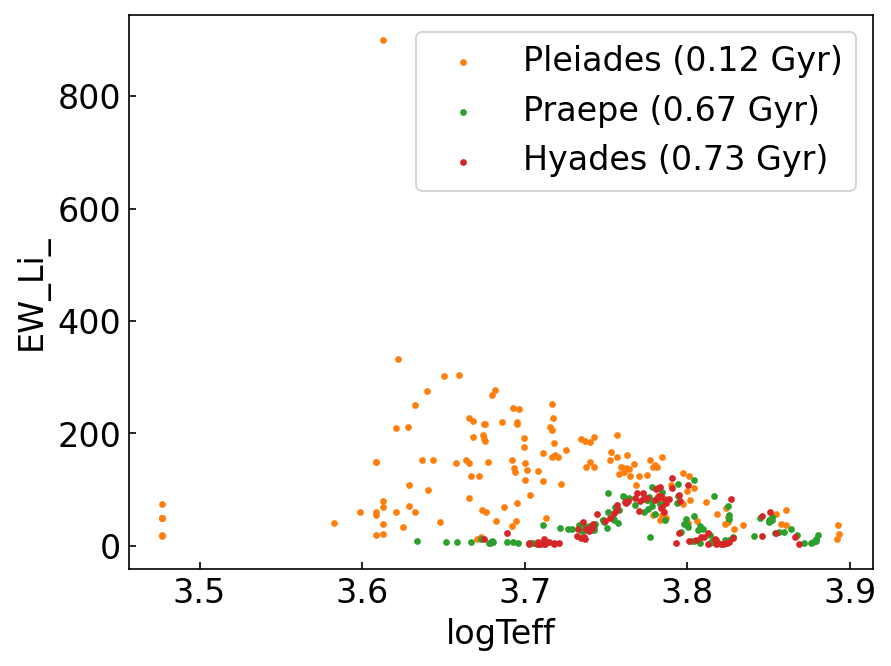

In [8]:
from utils import plot_planets

x, y ='logTeff', 'EW_Li_'
ax = plot_planets(df_Pleiades, x, y, 
                plot_kwds={'marker': '.', 'c':'C1', 'label': 'Pleiades (0.12 Gyr)'}
                                            )
                                            
_ =  plot_planets(df_Praesepe, x, y, ax=ax,
                plot_kwds={'marker': '.', 'c':'C2', 'label': 'Praepe (0.67 Gyr)'}
                                            )

_ =  plot_planets(df_Hyades, x, y, ax=ax,
                plot_kwds={'marker': '.', 'c':'C3', 'label': 'Hyades (0.73 Gyr)'}
                                             )

In [10]:
fp = "../figures/EW_Teff.png"
ax.figure.savefig(fp, bbox_inches="tight")